# Visualizing Spreadsheet Data

### Completed by Nighat Ansari

    Using given data about mortality across several ages, races, and genders, I accessed and manipulated a specific subset to visualize life expectancy for non-hispanic white men and women.


### Importing
Importing these modules will allow the notebook to graph and use dictionaries. I am also loading the spreadsheet data we will be accessing and storing information from.

In [11]:
import sys
sys.path = ['',
 '/anaconda3/bin',
 '/anaconda3/lib/python36.zip',
 '/anaconda3/lib/python3.6',
 '/anaconda3/lib/python3.6/lib-dynload',
 '/Users/nighatansari/.local/lib/python3.6/site-packages',
 '/anaconda3/lib/python3.6/site-packages',
 '/anaconda3/lib/python3.6/site-packages/aeosa',
 '/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/Users/nighatansari/.ipython']

In [16]:
import csv
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

from collections import defaultdict, Counter

#Spreadsheet
file = open('cdc0.tsv')
reader = csv.reader(file, delimiter = "\t")


Answer: 


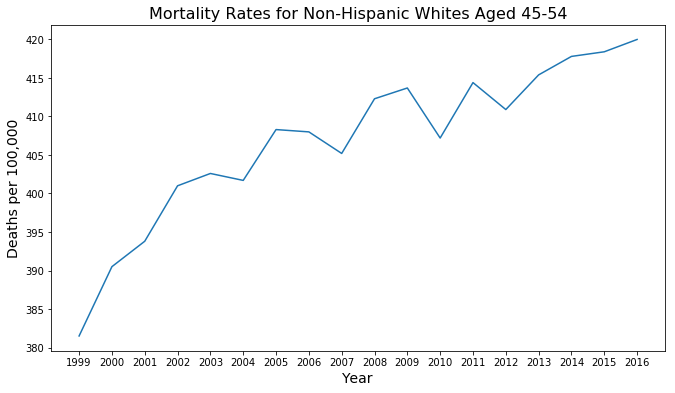

In [5]:
totals = defaultdict(int)

for row in reader:
    if len(row)>4 and row[1] == "White" and row[5] == "Not Hispanic or Latino" and row[0] == "Total":
            totals[row[4]] = float(row[11])
            
plt.figure(figsize = (11,6))
years = sorted(totals.keys())
vals = [totals[yr] for yr in years]

plt.plot(years,vals, '-');
plt.title("Mortality Rates for Non-Hispanic Whites Aged 45-54", fontsize = 16);
plt.ylabel("Deaths per 100,000", fontsize = 14);
plt.xlabel("Year", fontsize = 14);
print('\033[1m' + "Answer: " + '\033[0m')

Answer: 



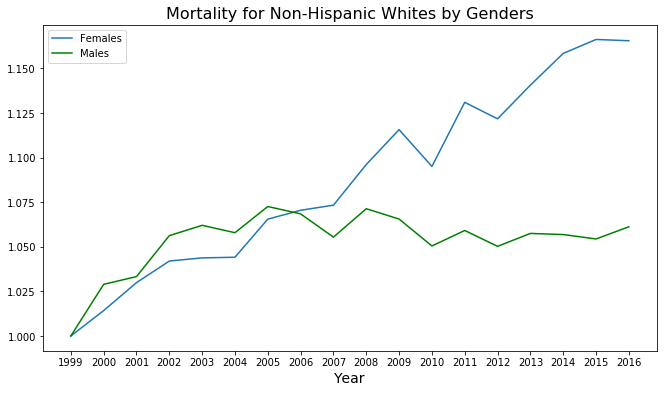

In [7]:
females = defaultdict(int)
males = defaultdict(int)

with open('cdc0.tsv') as csvfile:
    for row in csv.reader(csvfile, delimiter='\t'):
        if len(row)>=12 and row[1] == 'White' and row[5] == 'Not Hispanic or Latino': 
            if row[8] == 'F':
                females[row[4]] = float(row[11])
            elif row[8] == 'M':
                males[row[4]] = float(row[11])
                
scaled_females = [i/females['1999'] for i in females.values()]
scaled_males = [i/males['1999'] for i in males.values()]

plt.figure(figsize = (11,6))
plt.plot(females.keys(), scaled_females, '-', label = "Females");
plt.plot(males.keys(), scaled_males, 'g-', label = "Males");
plt.title("Mortality for Non-Hispanic Whites by Genders", fontsize = 16)
plt.xlabel("Year", fontsize = 14)
plt.legend();
print('\033[1m' + "Answer: " + '\033[0m')
print()


In [8]:
females = defaultdict(int)
males = defaultdict(int)

with open('cdc1.tsv') as csvfile:
    for row in csv.reader(csvfile, delimiter='\t'):
        if len(row)>=12 and row[1] == 'White' and row[5] == 'Not Hispanic or Latino': 
            if row[8] == 'F':
                if row[13] == "Unreliable"or row[13] == "Not Applicable": continue
                females[row[9]] = float(row[13])
            elif row[8] == 'M':
                males[row[9]] = float(row[13])
                

females.pop("District of Columbia")
males.pop("District of Columbia")

267.3

In [20]:
# This cell smoothes slopes for both males and females across all states.

female_states = defaultdict(list)
male_states = defaultdict(list)

with open('cdc1.tsv') as csvfile:
    for row in csv.reader(csvfile, delimiter='\t'):
        if len(row)>=12 and row[1] == 'White' and row[5] == 'Not Hispanic or Latino':
            if row[8] == 'F':
                if row[13] == "Unreliable"or row[13] == "Not Applicable": continue
                female_states[row[9]].append((int(row[3]),float(row[13])))
            elif row[8] == 'M':
                male_states[row[9]].append((int(row[3]), float(row[13])))
                
female_states.pop("District of Columbia")
male_states.pop("District of Columbia")

scaled_fvals = defaultdict(list)
scaled_mvals = defaultdict(list)

for x in female_states:
    for y,z in female_states[x]:
        scaled_fvals[x].append((y, z/female_states[x][0][1])) 

for x in male_states:
    for y,z in male_states[x]:
        scaled_mvals[x].append((y, z/male_states[x][0][1])) 

dict_fscaled = {}
dict_mscaled = {}

for state in scaled_fvals:
    years = []
    vals = []
    for y,z in scaled_fvals[state]:
        years.append(y)
        vals.append(z)
    dict_fscaled[state] = (linregress(years, vals).slope * 17)
    
for state in scaled_mvals:
    years = []
    vals = []
    for y,z in scaled_mvals[state]:
        years.append(y)
        vals.append(z)
    dict_mscaled[state] = (linregress(years, vals).slope * 17)

rev_fem = {v: k for k, v in dict_fscaled.items()}
descend_fem = sorted(rev_fem.items(), reverse = True)

rev_mas = {v: k for k, v in dict_mscaled.items()}
descend_mas = sorted(rev_mas.items(), reverse = True)

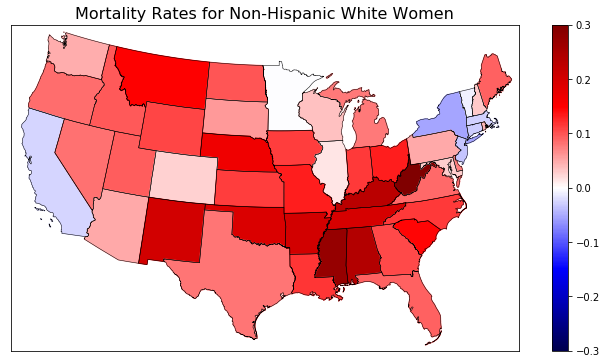

In [23]:
#Women Graphic
x_min = -50
x_max = 50

nolottery=('Nevada','Utah','Mississippi','Alabama')
plt.figure(figsize=(12,6))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
             projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

m.readshapefile('geodata/st99_d90','states',drawbounds=True,color='k')
for polygon,info in zip(m.states,m.states_info):
    state=info['NAME']
    if state in ("District of Columbia"): continue
    xdata,ydata = zip(*polygon)
    
    slp = dict_fscaled[state]
    mycmap = plt.cm.get_cmap('seismic')
    #Use West Virginia
    brcolor = mycmap(0.5 + slp/(0.6506997 * 2))
    
    plt.fill(xdata, ydata, color = brcolor, edgecolor = 'darkgrey')
plt.title("Mortality Rates for Non-Hispanic White Women", fontsize = 16);
sm = plt.cm.ScalarMappable(cmap=mycmap, norm=plt.Normalize(vmin=-0.30, vmax=0.30))
sm._A = []
plt.colorbar(sm);
    

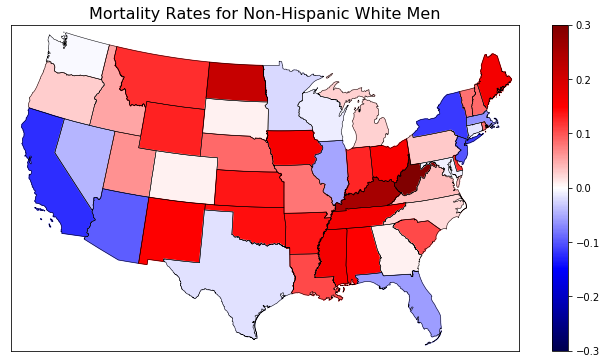

In [22]:
#Men Graphic
x_min = -50
x_max = 50

nolottery=('Nevada','Utah','Mississippi','Alabama')
plt.figure(figsize=(12,6))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
             projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

m.readshapefile('geodata/st99_d90','states',drawbounds=True,color='k')
for polygon,info in zip(m.states,m.states_info):
    state=info['NAME']
    if state in ("District of Columbia"): continue
    xdata,ydata = zip(*polygon)
    
    slp = dict_mscaled[state]
    mycmap = plt.cm.get_cmap('seismic')
    brcolor = mycmap(0.5 + slp/(0.344679 * 2))
    
    plt.fill(xdata, ydata, color = brcolor, edgecolor = 'darkgrey')
plt.title("Mortality Rates for Non-Hispanic White Men", fontsize = 16);
sm = plt.cm.ScalarMappable(cmap=mycmap, norm=plt.Normalize(vmin=-0.30, vmax=0.30))
sm._A = []
plt.colorbar(sm);